In [45]:
import numpy as np
import thinkstats2
import thinkplot
import nsfg


preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

def UnbiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, 1.0/x)
        
    new_pmf.Normalize()
    return new_pmf

resp = nsfg.ReadFemResp()
numkdhh = resp.numkdhh


In [ ]:
Exercise 3-1
Something like the class size paradox appears if you survey children and ask how many children are in their family. 
Families with many children are more likely to appear in your smaple,
and families with no children have no chance to be in the sample.
Use the NSFG respondent variable NUMKDHH to construct the actual distribution 
for the number of children under 18 in the household.

Now compute the biased distribtuion we would see if we surveyed the children and asked them how many children
under 18 (including themselves) are in their household.

Plot the actual and biased distribtuions, and compute their means. As a starting place, you can use chap03ex.ipynb


Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318})
Actual mean = 1.024205155043831


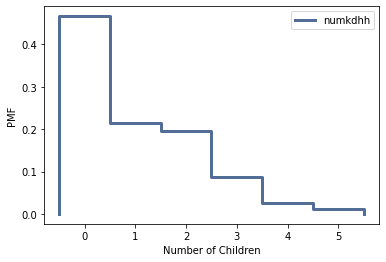

In [47]:
#Exercise 3-1
actualPmf = thinkstats2.Pmf(numkdhh, label='numkdhh')
print(actualPmf)
thinkplot.Pmf(actualPmf)
thinkplot.Config(xlabel='Number of Children', ylabel='PMF')
a_mean = actualPmf.Mean()
print(f"Actual mean = {a_mean}")

Biased Mean: 2.403679100664282


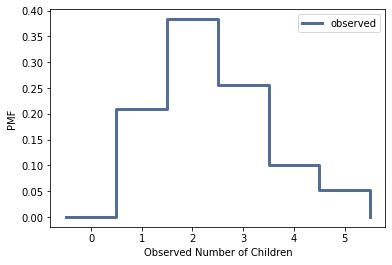

In [42]:
#Exercise 3-1
biasedPmf = BiasPmf(actualPmf, label='observed')
thinkplot.Pmf(biasedPmf)
thinkplot.Config(xlabel='Observed Number of Children', ylabel='PMF')
b_mean = biasedPmf.Mean()
print(f"Biased Mean: {b_mean}")

#Exercise 3-1
thinkplot.PrePlot(2)
thinkplot.Pmfs([actualPmf, biasedPmf])
thinkplot.Show(xlabel='Number of Children', ylabel="PMF")

In [76]:
#Exercise 3-2

#pg. 22 mean = sum of the values divided by the number of values 
# mean = 1/n * sum(x)

#pg. 36
# x = unique values in PMF and p = PMF(x)
def PmfMean(pmf):
    mean = 0.0
    for x, p in pmf.Items():
        mean += p * x
    return mean

def PmfVar(pmf):
    var = 0.0
    for x, p in pmf.Items():
        var += p * ((x- pmf.Mean()) ** 2)
    return var


test_actual_mean = PmfMean(actualPmf)
test_actual_var = PmfVar(actualPmf)
test_biased_mean = PmfMean(biasedPmf)
test_biased_var = PmfVar(biasedPmf)

assert(actualPmf.Mean() == test_actual_mean)
assert(actualPmf.Var() == test_actual_var)
assert(biasedPmf.Mean() == test_biased_mean)
assert(biasedPmf.Var() == test_biased_var)

print(f"Actual Mean: {test_actual_mean}")
print(f"Biased Mean: {test_biased_mean}")
print(f"Actual Var: {test_actual_var}")
print(f"Biased Var: {test_biased_var}")


Actual Mean: 1.024205155043831
Biased Mean: 2.403679100664282
Actual Var: 1.4128643263531195
Biased Var: 1.1732721055059874


In [77]:
#Exercise 4-1 
# I weighed 7lbs 6 oz at birth
import first

live, firsts, others = first.MakeFrames()


In [90]:
#Exercise 4-1 
print(firsts.columns)
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print(f"Firsts- w/ NA: {len(first_wgt)}, w/o NA: {len(first_wgt_dropna)}")

other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print(f"Others- w/ NA: {len(other_wgt)}, w/o NA: {len(other_wgt_dropna)}")

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='others')
first_pmf.Mean()

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)
Firsts- w/ NA: 4413, w/o NA: 4363
Others- w/ NA: 4735, w/o NA: 4675


7.201094430437775

In [100]:
#Exercise 4-1
def PercentileRank(scores, observed):
    count = 0 
    for score in scores:
        if score <= observed:
            count += 1
    
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

t = [55, 66, 77, 88, 99]

assert(PercentileRank(t, 88) == 80.0)

def Percentile(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores) - 1) // 100
    return scores[index]
                               
        
assert(Percentile(t, 50) == 77)

def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
            
    prob = count / len(sample)
    return prob

t = [1,2,2,3,5]
EvalCdf(t, 0), EvalCdf(t, 1), EvalCdf(t, 2), EvalCdf(t, 3), EvalCdf(t, 4), EvalCdf(t, 5)



(0.0, 0.2, 0.6, 0.8, 0.8, 1.0)

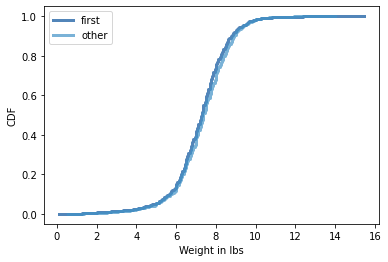

In [101]:
#Exercise 4-1
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')

thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Config(xlabel='Weight in lbs', ylabel='CDF')


In [106]:
#Exercise 4-1
#I am second born, so I will use the other_cdf distribution
other_cdf.PercentileRank(7.375)


50.93048128342246

No handles with labels found to put in legend.
No handles with labels found to put in legend.


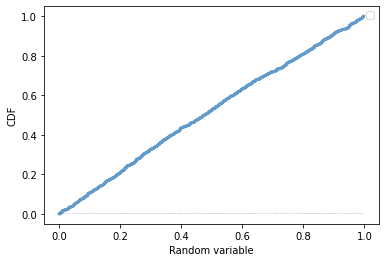

In [112]:
#Exercise 4-2
rand_nums = np.random.random(1000)

rand_pmf = thinkstats2.Pmf(rand_nums)
thinkplot.Pmf(rand_pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variable', ylabel="PMF")


rand_cdf = thinkstats2.Cdf(rand_nums)
thinkplot.Cdf(rand_cdf)
thinkplot.Config(xlabel="Random variable", ylabel="CDF")